<a href="https://colab.research.google.com/github/Tsutomu-dayoo/DNN_lerning/blob/master/dataset_preperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

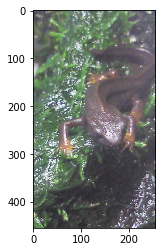

In [0]:
import numpy
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('drive/My Drive/images/akahara/akahara_0001.jpg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img2)

In [80]:
import cv2
import numpy as np
from glob import glob
import copy

num_classes = 2
img_height, img_width = 64, 64

CLS = ['akahara', 'madara'] #akahara->0, madara->1
path = 'drive/My Drive/images/'

def data_load(path):
    xs = []
    ts = []
    paths = []

    for dir_path in glob(path + '/*'):
      for path in glob(dir_path + '/*'):
        x = cv2.imread(path)
        x = cv2.resize(x, (img_width, img_height)).astype(np.float32)
        x /= 255. #255で割って[0,1]の間に正規化する
        xs.append(x) #画像情報を配列化
        x2 = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

        for i, cls in enumerate(CLS): #akahara->0, madara->1　インデックスと要素を取得
          if cls in path:#要素の名前と同じファイル名があればその数字でラベル付け
            #t = i
            ts.append(i)#対応するラベルを配列化

        paths.append(path)#対応するラベルを配列化
    xs = np.array(xs, dtype=np.float32)#行列化
    ts = np.array(ts, dtype=np.int)
    xs = xs.transpose(0,3,1,2)

    return xs, ts, paths

xs, ts, paths = data_load('drive/My Drive/images/')

mb = 3#ミニバッチの数
mbi = 0
train_ind = np.arange(len(paths))#data数を数える->[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
np.random.shuffle(train_ind)#引数をランダムにして元の引数に戻す、この場合はtrain_indをそのまま使える

for i in range(10):
  if mbi + mb > len(xs):
      mb_ind = copy.copy(train_ind)[mbi:]
      np.random.shuffle(train_ind)
      mb_ind = np.hstack((mb_ind, train_ind[:(mb-(len(xs)-mbi))]))
      mbi = mb - (len(xs) - mbi)
  else:
      mb_ind = train_ind[mbi: mbi+mb]
      mbi += mb

  print(mb_ind)

[13  1  2]
[ 9 12 11]
[ 0 15  7]
[5 6 8]
[ 3  4 14]
[10  1  4]
[ 5 10  2]
[11  7  8]
[15  6  0]
[13  9 14]
